# Inferential Statistics
sama statistik juga dan ambil dari data juga, bedanya disini kita mau ambil kesimpulan.

# Confidence Interval
statement tentang datanya.   
misal: pria Semarang tingginya ada di antara 170-180cm. 175cm +- 5cm   
pria Semarang tingginya ada di antara 150-200cm. 175cm +- 25cm

misal: pria Semarang 80-90% tingginya lebih dari atau sama dengan 180cm.

best estimate +- error

1. CI untuk rata2 (mean)
    - best estimate = mean
    - error = z * standard_error
    - z = 1.96 (95% yakin)
    - standard_error = std_dev / np.sqrt(jumlah_data)
    
2. CI untuk proporsi populasi
    - best estimate = proporsi
    - error = z * standard_error
    - z = 1.96 (95% yakin)
    - standard_error = np.sqrt(p * (1-p) / jumlah_data)
    
# Hypothesis Testing
- membuat pernyataan tentang datanya

datang 2x seminggu lebih cepat selesai belajar dibandingkan datang 1x seminggu.

datang 1x seminggu kapan selesainya? 8.2 minggu

alt hypothesis, statement yg mau kita buat   
H1 = u < 8.2 minggu 

null hypothesis, statement kita dibalik   
H0 = u >= 8.2 minggu

- hitung p-value
    - jika p-value < alpha (alpha tingkat error, jika error 5% saja maka alpha 0.05)   
        REJECT null hypothesis
    - jika p-value >= alpha   
        FAIL reject null hypothesis

# Terminologi statistik

## Random variable
data numerik yang acak

### Discrete random variable
data numerik yang bulat yang acak, misalnya hasil lempar dadu. cuma bisa 1,2,3,4,5,6
- probability mass function

### Continuous random variable
data numerik yang acak yang terus berjalan, nyambung terus. misalnya waktu, tinggi badan, berat badan
- probability density function

tujuan probability function adalah menunjukkan untuk setiap kemungkinan sebuah random variable, kemungkinan dapatnya berapa?

# Contoh: Uniform Distribution
kita buat kumpulan data isi angka random  yang continuous, dengan sifat penyebaran datanya uniform - kemungkinan dapat sebuah random variable sama semua.

kita plot data buatan tadi untuk melihat secara visual bentuk data yang uniform distribution

In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [2]:
from scipy.stats import uniform
# membuat data dummy yang sifatnya uniform distribution
data_uniform = uniform.rvs(size=10000, loc = 10, scale=20)

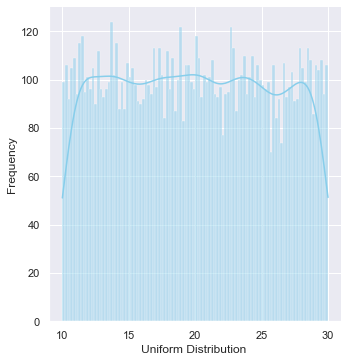

In [3]:
# plot secara visual sebuah uniform distribution

ax = sns.displot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

# Normal Distribution
saat kemungkinan mendapatkan sebuah random variable lebih tinggi di sebuah angka rata-rata, dan semakin kecil kemungkinannya kalau jauh dari rata2

In [4]:
from scipy.stats import norm
# membuat dummy data untuk kumpulan data yang sifatnya normal distribution
data_normal = norm.rvs(size=10000,loc=0,scale=1)

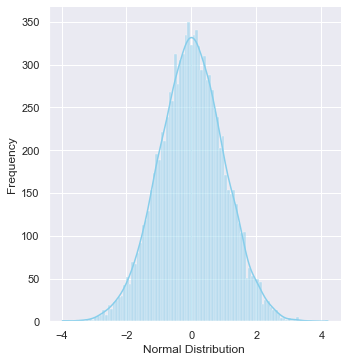

In [5]:
# visualisasi normal distribution
ax = sns.displot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')


# Confidence Interval
## Case Study: data orang sakit jantung

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_heart = pd.read_csv('dataset/heart.csv')
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# buat kolom baru untuk gender
df_heart['gender'] =  df_heart['sex'].replace({1: "Pria", 0:"Wanita"})
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Pria
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pria
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Pria
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Pria
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Wanita


In [10]:
# hapus kolom tidak terpakai
df_heart = df_heart.drop(columns=['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', ])

In [11]:
df_heart.head()

,age,chol,target,gender
0,52,212,0,Pria
1,53,203,0,Pria
2,70,174,0,Pria
3,61,203,0,Pria
4,62,294,0,Wanita


In [12]:
df_heart = df_heart.dropna() # biasakan missing value dihapus atau di fill

## Cari: Proporsi wanita yang punya sakit jantung

best estimate +- error
- best estimate = proporsi
- error = z * standard_error
- z = 1.96 (95% yakin)
- standard_error = np.sqrt(p * (1-p) / jumlah_data)

In [13]:
pd.crosstab(df_heart['gender'], df_heart['target'])

target,0,1
gender,,
Pria,413,300
Wanita,86,226


In [14]:
prop = 226 / (86 + 226)
z = 1.96
jumlah_data = 86 + 226
std_err = np.sqrt(prop * (1-prop) / jumlah_data)
error = z * std_err

CI = (prop - error, prop + error)
print(CI)

(0.6747765651256307, 0.773941383592318)


67-77% wanita punya sakit jantung

## Cari: rata-rata kolesterol wanita berapa?

best estimate +- error
- best estimate = mean
- error = z * standard_error
- z = 1.96 (95% yakin)
- standard_error = std_dev / np.sqrt(jumlah_data)

In [15]:
df_heart.groupby("gender").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Pria    239.237027  43.155535  713
Wanita  261.455128  64.466781  312

In [16]:
be = 261.455128
z = 1.96
standard_error = 64.466781 / np.sqrt(312)
error = z * standard_error

CI = (be - error, be + error)
print(CI)

(254.30169095203016, 268.6085650479699)


tingkat kolesterol wanita ada di 254 - 268

# Hypothesis Testing

In [17]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Case Study - membandingkan proporsi untuk populasi yang sama
dulu 52% ortu percaya x, sekarang makin banyak ortu percaya x

H1: u > 0.52

H0: u <= 0.52

data: 1018 ortu, 56% percaya x

In [18]:
zscore, pvalue = sm.stats.proportions_ztest(0.56 * 1018, 1018, 0.52, alternative='larger')
print(pvalue)

0.005069273865860533


In [19]:
pvalue < 0.05

True

REJECT null hypothesis, konklusinya kemungkinan besar statement kita benar, H1 benar, ortu jaman sekarang yang percaya x ada lebih dari 52%

## Case Study - membandingkan rata2 antara dua populasi

apakah tingkat kolesterol pria beda dengan tingkat kolesterol wanita

H1: u_p != u_w

H0: u_p == u_w

In [20]:
df_heart.head()

,age,chol,target,gender
0,52,212,0,Pria
1,53,203,0,Pria
2,70,174,0,Pria
3,61,203,0,Pria
4,62,294,0,Wanita


In [21]:
df_wanita = df_heart[df_heart['gender']=='Wanita']['chol'].dropna()
df_pria = df_heart[df_heart['gender']=='Pria']['chol'].dropna()

# gunakan sm lagi
zscore, pvalue = sm.stats.ztest(df_wanita, df_pria, alternative="two-sided")
print(pvalue)

9.827887332708898e-11


In [22]:
pvalue < 0.05

True

ada perbedaan signifikan antara u_p dengan u_w berarti mereka tidak sama, REJECT null hypothesis yang mengatakan tingkat kolesterol pria dan wanita sama. kemungkinan besar tingkat kolesterol pria dan wanita berbeda. 

## Case Study - membandingkan proporsi antara 2 populasi berbeda

proporsi sakit jantung di Ireland 42%. Apakah proporsi di Amerika lebih tinggi?

diberikan data orang sakit jantung di Amerika.

### step 1 - tulis null hypothesis

H1: p > 0.42   
H0: p == 0.42

In [29]:
### step 2 - hitung proporsi sakit jantung di Amerika
n_sakit = len(df_heart[df_heart['target']==1])
n = len(df_heart)

p_us = n_sakit / n
print(p_us)

0.5131707317073171


karena p_us sudah > dari 0.42 sekarang kita cek apakah perbedaannya signifikan

### step 3 - hitung tes statistik
(best_estimate - hypothesized_estimate) / standard_error

- best_estimate = p
- hypothesized_estimate = p_banding
- standard_error = np.sqrt(p * (1-p) / jumlah_data)


In [30]:
be = p_us

he = 0.42

p = 0.42
jumlah_data = len(df_heart)
se = np.sqrt(p * (1-p) / jumlah_data)

test_stat = (be - he) / se
print(test_stat)

6.04369858636477


In [32]:
### Step 4: cari p-value
import scipy.stats.distributions as dist

pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

print(pvalue)

1.5062078087269162e-09


In [33]:
pvalue < 0.05

True

karena pvalue < alpha (5%), maka kita bisa REJECT null hypothesis. jadi kita bisa bilang kalau proporsi orang sakit di Amerika lebih banyak, berbeda secara signifikan, dengan proporsi orang sakit di Ireland.